###<b> I. Introduction

In the contemporary automotive market, where consumers have an abundance of options, predicting the price of a car accurately has emerged as a critical challenge. The interplay of various factors, such as make, model, year, engine specifications, and market trends, contributes to the complex pricing dynamics of vehicles. In light of this, our project aims to delve into the world of data-driven prediction to facilitate car price estimation.

The dataset at hand encompasses a diverse array of information about different car models, ranging from their make and model to intricate details like engine specifications and fuel types. With a comprehensive set of attributes such as Engine HP, Engine Cylinders, Transmission Type, and more, the dataset encapsulates the multidimensional nature of car attributes that impact pricing.

By harnessing the power of machine learning algorithms and predictive modeling techniques, we intend to build a robust car price prediction model. This model will learn from historical data and uncover underlying patterns, enabling it to predict the monetary value of a vehicle accurately. The project's goal is to develop a solution that empowers both consumers and the automotive industry, facilitating informed decision-making during car purchases or sales.

###<b>2. Data Description



1. **Make and Model:**
   The "Make" attribute represents the car manufacturer, while the "Model" attribute specifies the model name or designation of the car.

2. **Year:**
   The "Year" attribute denotes the manufacturing year of the car, which is a crucial factor influencing the car's value due to factors like depreciation and technological advancements.

3. **Engine Fuel Type:**
   This attribute categorizes the type of fuel used by the car, such as gasoline, diesel, or electric. Fuel type can significantly impact the car's market value due to varying fuel costs and environmental considerations.

4. **Engine HP (Horsepower):**
   "Engine HP" indicates the power generated by the car's engine, which often correlates with performance. Higher horsepower engines might command higher prices due to enhanced driving capabilities.

5. **Engine Cylinders:**
   This attribute specifies the number of cylinders in the car's engine, a factor that affects engine performance and efficiency. More cylinders often indicate higher power and price.

6. **Transmission Type:**
   Denotes the type of transmission in the car, such as automatic or manual. Transmission type can influence driving experience and, consequently, the car's price.

7. **Driven Wheels:**
   Indicates the wheels that receive power from the engine, influencing traction and handling. Different drive configurations (e.g., front-wheel drive, rear-wheel drive) can impact pricing.

8. **Number of Doors:**
   Represents the number of doors in the car, contributing to its design, functionality, and overall aesthetics.

9. **Market Category:**
   Categorizes the car based on market segment, such as luxury, compact, or high-performance. Market category affects the target audience and, subsequently, the price range.

10. **Vehicle Size:**
    Specifies the size category of the car, ranging from small to large. Size can influence interior space, comfort, and practicality.

11. **Vehicle Style:**
    Describes the overall style or body type of the car, such as sedan, coupe, convertible, etc.

12. **Highway MPG and City MPG:**
    Indicate the car's fuel efficiency in terms of miles per gallon (MPG) on the highway and in city driving conditions, respectively.

13. **Popularity:**
    Represents the popularity of the car, likely derived from factors like sales volume and market demand.

14. **MSRP (Manufacturer's Suggested Retail Price):**
    This is the target variable, representing the car's suggested price by the manufacturer. It serves as the reference point for comparing predicted prices.


###<b>3. Initial Data Exploration

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=b04f528ff90939f17024da5abdb15ee0fa124fc4a8ca27bc35353b9b6b5e7bf8
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import seaborn as sns
from pyspark.ml.feature import StringIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import numpy as np


import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")

####<b>3.2. Loading data using pyspark

In [3]:
spark = SparkSession.builder.appName("Car_Price_Prediction").getOrCreate()
data = spark.read.csv("data.csv", header=True, inferSchema=True)
data.show(3)

+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|rear wheel drive|              2|  Luxury,Performance|     Compact|  Convertible

In [4]:
data.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Market Category: string (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



In [5]:
num_rows = data.count()
num_cols = len(data.columns)
print(f"No. of rows: {num_rows}")
print(f"No. of columns: {num_cols}")

No. of rows: 11914
No. of columns: 16


It can be observed that there are 11914 rows and 16 features

In [6]:
data.describe().show()

+-------+-----+------------------+------------------+----------------+------------------+-----------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+-----------------+------------------+------------------+
|summary| Make|             Model|              Year|Engine Fuel Type|         Engine HP| Engine Cylinders|Transmission Type|   Driven_Wheels|   Number of Doors|   Market Category|Vehicle Size|Vehicle Style|       highway MPG|         city mpg|        Popularity|              MSRP|
+-------+-----+------------------+------------------+----------------+------------------+-----------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+-----------------+------------------+------------------+
|  count|11914|             11914|             11914|           11911|             11845|            11884|            11914|           11914|         

In [7]:
data.dtypes

[('Make', 'string'),
 ('Model', 'string'),
 ('Year', 'int'),
 ('Engine Fuel Type', 'string'),
 ('Engine HP', 'int'),
 ('Engine Cylinders', 'int'),
 ('Transmission Type', 'string'),
 ('Driven_Wheels', 'string'),
 ('Number of Doors', 'int'),
 ('Market Category', 'string'),
 ('Vehicle Size', 'string'),
 ('Vehicle Style', 'string'),
 ('highway MPG', 'int'),
 ('city mpg', 'int'),
 ('Popularity', 'int'),
 ('MSRP', 'int')]



Observations:
1. **Attribute Types:** The dataset consists of various attributes that represent different aspects of the car's characteristics, including Make, Model, Year, Engine specifications, Transmission Type, Driven Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city MPG, Popularity, and MSRP (Price). These attributes have different data types, such as string and integer, which reflect the nature of the information they represent.

2. **Categorical and Numerical Attributes:** The attributes 'Make,' 'Model,' 'Engine Fuel Type,' 'Transmission Type,' 'Driven Wheels,' 'Market Category,' 'Vehicle Size,' and 'Vehicle Style' are categorical attributes represented by string data types. On the other hand, attributes like 'Year,' 'Engine HP,' 'Engine Cylinders,' 'Number of Doors,' 'highway MPG,' 'city MPG,' 'Popularity,' and 'MSRP' are numerical attributes represented by integer data types.

3. **Year as an Integer:** The 'Year' attribute, representing the year of the car's manufacture, is stored as an integer. This allows for straightforward numerical calculations and comparisons related to the car's age.

4. **Engine Specifications:** Attributes related to the car's engine specifications, such as 'Engine HP' (Horsepower) and 'Engine Cylinders,' are also stored as integers. This facilitates numerical analysis and modeling involving engine performance.

5. **Categorical Attributes:** The categorical attributes provide important information about the car's features, characteristics, and classifications. These attributes play a crucial role in influencing the car's price and are likely to be included in the feature engineering and modeling phases.

6. **Numerical Attributes:** The numerical attributes, including 'highway MPG,' 'city MPG,' 'Popularity,' and 'MSRP,' are essential for understanding the car's fuel efficiency, popularity, and price distribution. These attributes will likely be used as features for predicting the car's price.


In [8]:
for column in [column for column in data.columns if data.select(column).distinct().count() < 12]:
    data.select(column).distinct().show()

+--------------------+
|    Engine Fuel Type|
+--------------------+
|premium unleaded ...|
|                null|
|flex-fuel (unlead...|
|flex-fuel (unlead...|
|              diesel|
|flex-fuel (premiu...|
|         natural gas|
|flex-fuel (premiu...|
|premium unleaded ...|
|            electric|
|    regular unleaded|
+--------------------+

+----------------+
|Engine Cylinders|
+----------------+
|              12|
|            null|
|               6|
|              16|
|               3|
|               5|
|               4|
|               8|
|              10|
|               0|
+----------------+

+-----------------+
|Transmission Type|
+-----------------+
|           MANUAL|
|          UNKNOWN|
|        AUTOMATIC|
| AUTOMATED_MANUAL|
|     DIRECT_DRIVE|
+-----------------+

+-----------------+
|    Driven_Wheels|
+-----------------+
| four wheel drive|
| rear wheel drive|
|  all wheel drive|
|front wheel drive|
+-----------------+

+---------------+
|Number of Doors|
+--------

<b>Observations</b>

1. **Data Completeness and Counts:** The 'count' row indicates that the dataset consists of 11,914 records. The 'count' column values reveal that some attributes have missing values, such as 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', and 'Number of Doors'. The variable 'Make' has no missing values.

2. **Average Year and Engine Characteristics:** The mean 'Year' indicates that the dataset comprises car records spanning from 1990 to 2017, with an average year of approximately 2010. The 'Engine HP' and 'Engine Cylinders' columns' averages provide insights into the power and engine configurations of the cars.

3. **Transmission and Driven Wheels:** The 'Transmission Type' and 'Driven_Wheels' columns don't show specific statistical measures due to their categorical nature. However, they offer information about how the cars are driven and their transmission types.

4. **Market Category and Vehicle Size:** The 'Market Category' column lacks summary statistics, but it contains valuable information about the type of market a car belongs to. The 'Vehicle Size' and 'Vehicle Style' also provide categorical insights about the size and style of the cars.

5. **Fuel Efficiency and Price:** The 'highway MPG' and 'city mpg' columns reveal the fuel efficiency of the cars, with average values indicating the approximate miles per gallon. The 'MSRP' column's statistics show the distribution of car prices, with an average price of around $40,594.

6. **Popularity and Data Spread:** The 'Popularity' column depicts the popularity of different car models. The 'stddev' row provides the standard deviation for each column, indicating the spread of values from the mean.

7. **Minimum and Maximum Values:** The 'min' and 'max' rows highlight the range of values in categorical and numerical columns, showcasing the diversity of attributes in the dataset.


###<b> Data Preprocessing

<b> Check for missing values

In [9]:
missing_counts = data.select([F.count(F.when(F.col(column).isNull(), column)).alias(column) for column in data.columns])
missing_counts_df = missing_counts.toPandas().transpose()
missing_counts_df.columns = ['Missing Count']
missing_counts_df['Percentage'] = (missing_counts_df['Missing Count'] / data.count()) * 100
print("Missing Values Overview:")
print(missing_counts_df)


Missing Values Overview:
                   Missing Count  Percentage
Make                           0    0.000000
Model                          0    0.000000
Year                           0    0.000000
Engine Fuel Type               3    0.025180
Engine HP                     69    0.579151
Engine Cylinders              30    0.251805
Transmission Type              0    0.000000
Driven_Wheels                  0    0.000000
Number of Doors                6    0.050361
Market Category                0    0.000000
Vehicle Size                   0    0.000000
Vehicle Style                  0    0.000000
highway MPG                    0    0.000000
city mpg                       0    0.000000
Popularity                     0    0.000000
MSRP                           0    0.000000


The above missing values overview highlights key observations related to the presence of missing data within the dataset. While most of the columns, such as Make, Model, Year, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, and MSRP, do not have any missing values, there are a few columns with varying degrees of missing data.

The column "Engine Fuel Type" has a negligible number of missing values (3), constituting a very small proportion of the overall dataset. Similarly, the columns "Engine Cylinders" and "Number of Doors" exhibit minimal instances of missing values (30 and 6, respectively), contributing to less than 1% of the entire dataset.

However, the "Engine HP" column shows a slightly higher number of missing values (69), representing approximately 0.58% of the dataset. This observation suggests the presence of some variability in data completeness across the attributes.

Given the relatively small percentage of missing values in the majority of columns, the dataset appears to be quite well-maintained. Further analysis and preprocessing steps can be taken to handle the missing data appropriately, which may involve imputation techniques based on the characteristics of the respective columns. It's crucial to ensure that any data imputation strategy aligns with the project's goals and doesn't introduce bias or inaccuracies into the analysis or modeling process.

<b> Imputing Null valus

In [10]:
from pyspark.sql.functions import when, col

# Filling missing values
data_filled = data.withColumn("Engine Fuel Type", when(col("Engine Fuel Type").isNull(), "unknown").otherwise(col("Engine Fuel Type")))
data_filled = data_filled.withColumn("Engine HP", when(col("Engine HP").isNull(), 0).otherwise(col("Engine HP")))
data_filled = data_filled.withColumn("Engine Cylinders", when(col("Engine Cylinders").isNull(), 0).otherwise(col("Engine Cylinders")))
data_filled = data_filled.withColumn("Number of Doors", when(col("Number of Doors").isNull(), 0).otherwise(col("Number of Doors")))


data_filled.show(3)


+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|rear wheel drive|              2|  Luxury,Performance|     Compact|  Convertible

Missing values in the "Engine Fuel Type," "Engine HP," "Engine Cylinders," and "Number of Doors" columns are addressed as shown below.

1. **Engine Fuel Type:** The code replaces missing values in the "Engine Fuel Type" column with the value "unknown." This approach helps ensure that vehicles with missing fuel type information are still included in the analysis while clearly indicating the absence of this information.

2. **Engine HP and Engine Cylinders:** Missing values in the "Engine HP" and "Engine Cylinders" columns are replaced with the value 0. This can be a valid approach when information about these attributes is not available, as it avoids potential bias in the analysis due to incomplete data.

3. **Number of Doors:** Missing values in the "Number of Doors" column are filled with 0. Similar to the approach for engine-related attributes, this strategy maintains the presence of vehicles with missing door count information in the dataset without introducing unintended bias.


<b> Handling outliers

In [11]:
from pyspark.sql.functions import col, log1p
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

# Handling Outliers: Replacing Engine HP outliers with median
engine_hp_median = data_filled.approxQuantile("Engine HP", [0.5], 0.25)[0]
data_outlier_handled = data_filled.withColumn("Engine HP", when((col("Engine HP") < 100) | (col("Engine HP") > 1000), engine_hp_median).otherwise(col("Engine HP")))


Here outlier handling for the "Engine HP" feature has been performed using a replacement strategy. Outliers are data points that deviate significantly from the rest of the dataset and can distort the analysis or modeling process. In this case, outliers in the "Engine HP" attribute have been identified using a threshold criterion, where values less than 100 or greater than 1000 are considered as outliers. To address these outliers, the median value of "Engine HP" calculated from the dataset has been chosen as a robust measure of central tendency. The code then replaces the outlier values with this calculated median value, resulting in a dataset called "data_outlier_handled."


Outliers in the "Engine HP" attribute can significantly affect the statistical properties and modeling performance. By replacing these extreme values with the median, the code helps to mitigate the impact of outliers on subsequent analysis and machine learning algorithms. This approach ensures that the dataset's central tendency remains representative of the majority of data points, providing a more accurate and stable basis for analysis and prediction. The use of the median, a robust statistic, minimizes the influence of potential outlier distortions, leading to more reliable and meaningful results. This preprocessing step is crucial for enhancing the reliability of the "Engine HP" data and contributes to the overall quality and validity of the car price prediction model.

In [12]:
# Distribution Transformation: Applying log transformation to MSRP
data_transformed = data_outlier_handled.withColumn("MSRP", log1p("MSRP"))

In [13]:
# Standard Scaling: Scaling numeric features
numeric_cols = ["Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity", "MSRP"]
numeric_assembler = VectorAssembler(inputCols=numeric_cols, outputCol="numeric_features")
scaler = StandardScaler(inputCol="numeric_features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_pipeline = Pipeline(stages=[numeric_assembler, scaler])
data_scaled = scaler_pipeline.fit(data_transformed).transform(data_transformed)

data_scaled.show(3)


+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+------------------+--------------------+--------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity|              MSRP|    numeric_features|     scaled_features|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+------------------+--------------------+--------------------+
| BMW|1 Series M|2011|premium unleaded ...|    335.0|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|10.7393488

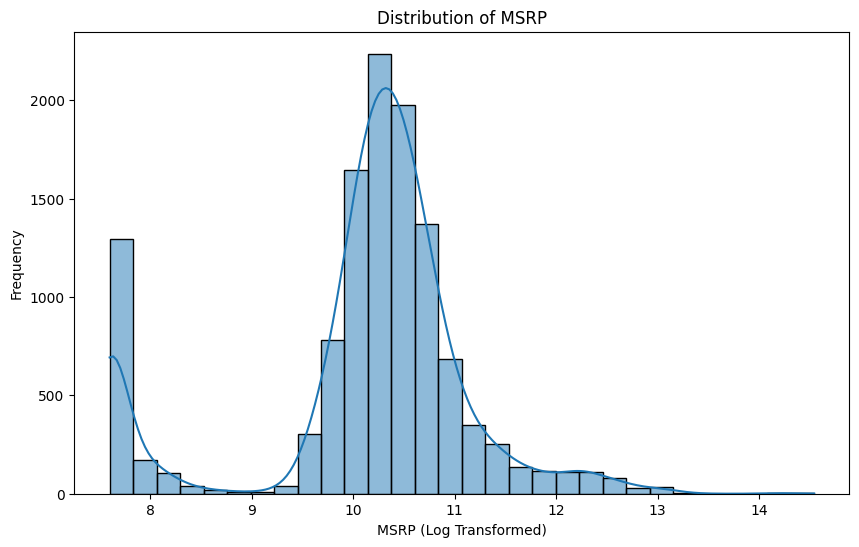

In [14]:

data_pandas = data_scaled.toPandas()

# Visualization 1: Histogram of MSRP
plt.figure(figsize=(10, 6))
sns.histplot(data_pandas['MSRP'], bins=30, kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP (Log Transformed)')
plt.ylabel('Frequency')
plt.show()



It can bee observed that the log tranformation has helped in making the output of the distribution normal.

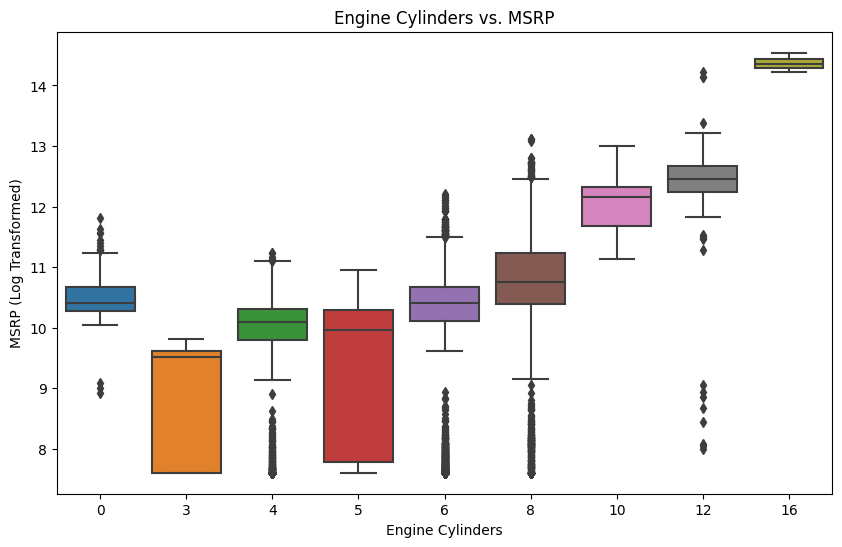

In [15]:

# Visualization 2: Boxplot of Engine Cylinders vs. MSRP
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_pandas['Engine Cylinders'], y=data_pandas['MSRP'])
plt.title('Engine Cylinders vs. MSRP')
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP (Log Transformed)')
plt.show()


- It can be observed that there are very few highly priced vechiles with 16 engine cyclinders and mostly are between 3 to 5

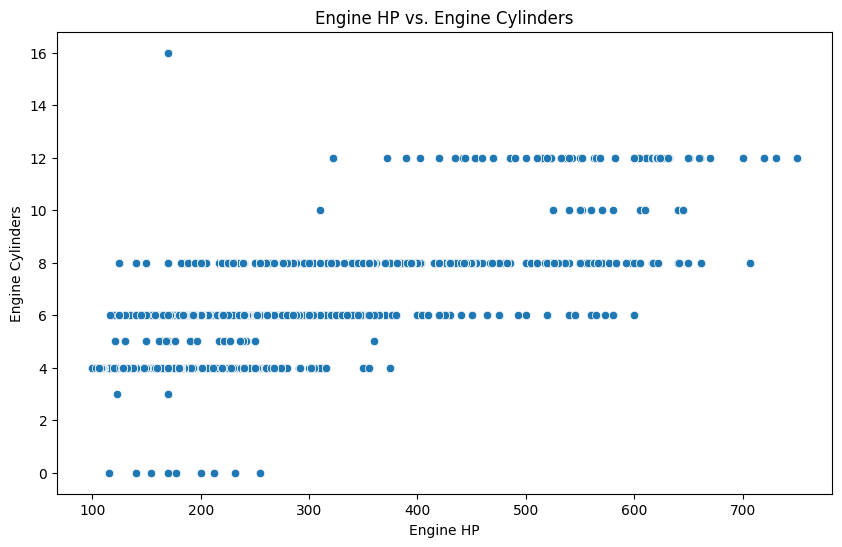

In [16]:

# Visualization 3: Scatterplot of Engine HP vs. Engine Cylinders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pandas['Engine HP'], y=data_pandas['Engine Cylinders'])
plt.title('Engine HP vs. Engine Cylinders')
plt.xlabel('Engine HP')
plt.ylabel('Engine Cylinders')
plt.show()


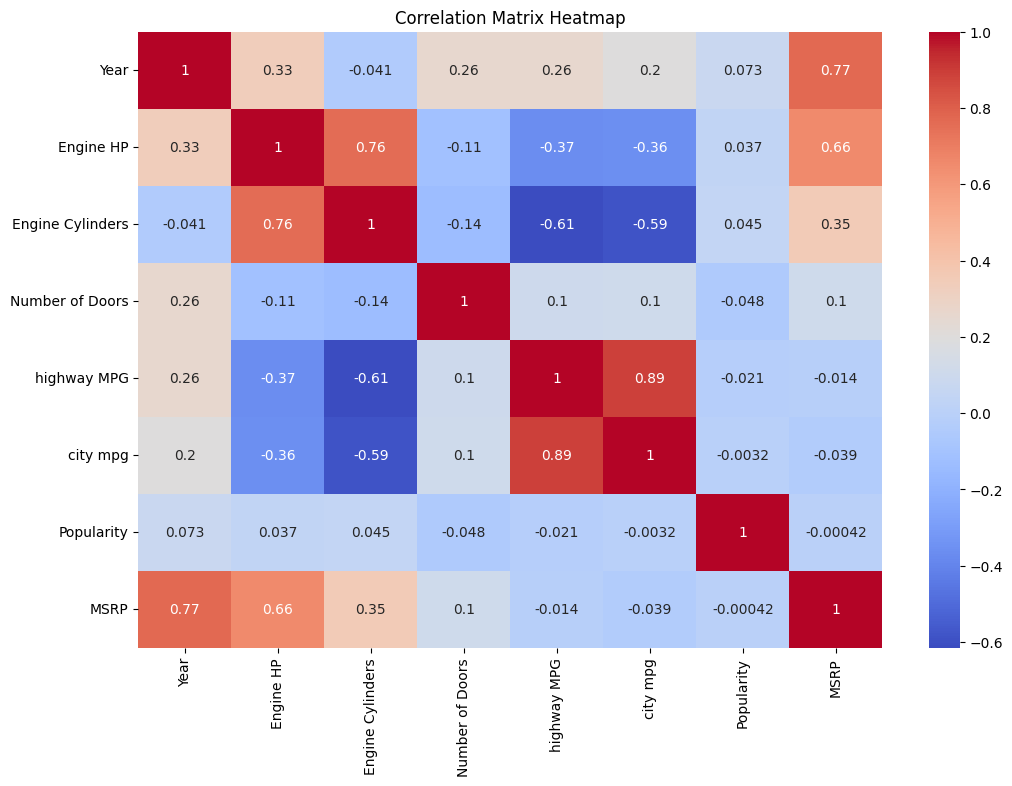

In [17]:

# Visualization 4: Correlation Matrix Heatmap
correlation_matrix = data_pandas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Observations:

1. **Year and MSRP Correlation:** The correlation coefficient of 0.768 indicates a moderately strong positive correlation between the "Year" and "MSRP" (Manufacturer's Suggested Retail Price) columns. This suggests that newer cars tend to have higher prices, which aligns with the general expectation that newer models often come with higher price tags due to technological advancements and market demand.

2. **Engine Characteristics Correlations:** The "Engine HP" and "Engine Cylinders" columns exhibit a positive correlation coefficient of 0.757, indicating a strong positive relationship between the engine's horsepower and the number of cylinders. This aligns with common automobile engineering knowledge, as more cylinders typically contribute to higher engine power.

3. **MPG and MSRP Correlations:** The "highway MPG" and "city mpg" columns show negative correlations with "MSRP" (-0.014 and -0.039 respectively). This implies that as the fuel efficiency of a car increases, its price tends to decrease slightly. This could be due to consumer preferences for more fuel-efficient vehicles and manufacturers' pricing strategies for economy cars.

4. **Number of Doors Correlation:** The correlation coefficient of 0.105 between the "Number of Doors" and "MSRP" suggests a weak positive correlation. This indicates that vehicles with more doors might have slightly higher prices, possibly due to larger size or enhanced features associated with higher-priced models.

5. **Popularity Correlation:** The correlation between "Popularity" and "MSRP" is extremely low (close to zero), indicating no substantial linear relationship between these two variables. Popularity may not have a direct impact on car prices as other factors such as brand reputation, features, and market demand might play a more significant role.

6. **Year and Engine Characteristics:** The "Year" column exhibits a positive correlation with "Engine HP" (0.333) and a negative correlation with "Engine Cylinders" (-0.041). This suggests that newer cars tend to have more powerful engines in terms of horsepower and fewer cylinders due to advancements in engine technology.

7. **MPG and Year Correlation:** "Year" shows a positive correlation with both "highway MPG" and "city mpg," indicating that newer vehicles tend to have higher fuel efficiency. This could be attributed to advancements in engine design, lightweight materials, and aerodynamics.


###<b> Feature Engineering

In [19]:

# Set the threshold for correlation coefficient
correlation_threshold = 0.8

# Find highly correlated features
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add(colname_i)
            highly_correlated.add(colname_j)

# Convert the set of highly correlated features to a list
highly_correlated_list = list(highly_correlated)

# Drop the highly correlated features from the DataFrame
data_pandas_filtered = data_pandas.drop(columns=highly_correlated_list)

data_pandas_filtered.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,numeric_features,scaled_features
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,3916,10.739349,"[335.0, 6.0, 2.0, 26.0, 19.0, 3916.0, 10.73934...","[3.151727648206337, 3.3323077968943364, 2.2612..."
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,3916,10.612779,"[300.0, 6.0, 2.0, 28.0, 19.0, 3916.0, 10.61277...","[2.822442670035526, 3.3323077968943364, 2.2612..."
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,3916,10.500977,"[300.0, 6.0, 2.0, 28.0, 20.0, 3916.0, 10.50097...","[2.822442670035526, 3.3323077968943364, 2.2612..."
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,3916,10.290483,"[230.0, 6.0, 2.0, 28.0, 18.0, 3916.0, 10.29048...","[2.163872713693903, 3.3323077968943364, 2.2612..."
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,3916,10.448744,"[230.0, 6.0, 2.0, 28.0, 18.0, 3916.0, 10.44874...","[2.163872713693903, 3.3323077968943364, 2.2612..."


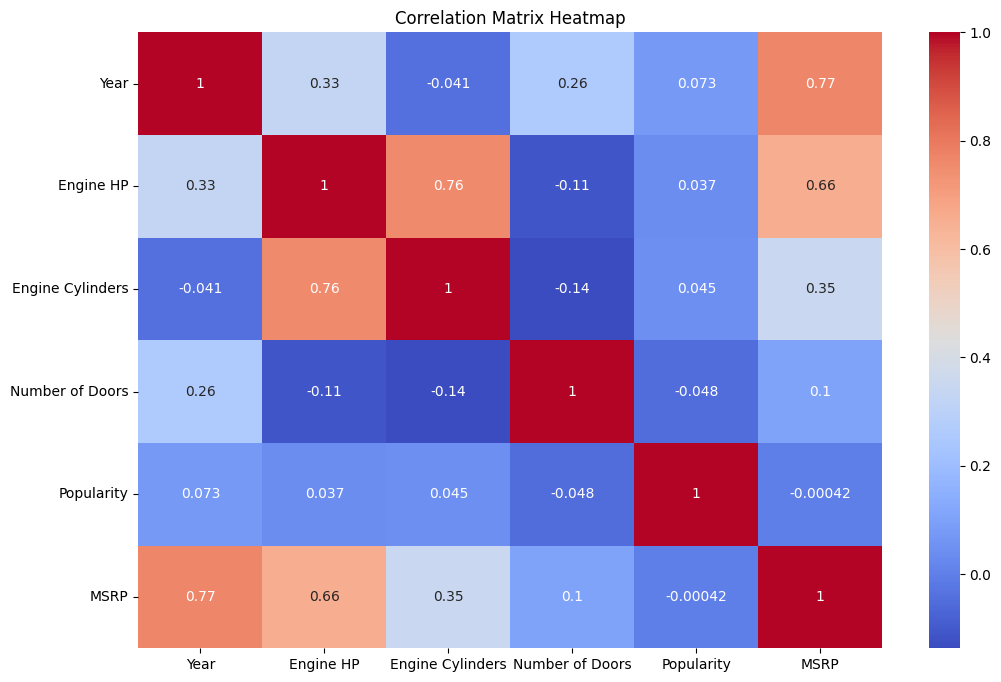

In [20]:

correlation_matrix = data_pandas_filtered.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
data_pandas_filtered.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,numeric_features,scaled_features
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,3916,10.739349,"[335.0, 6.0, 2.0, 26.0, 19.0, 3916.0, 10.73934...","[3.151727648206337, 3.3323077968943364, 2.2612..."
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,3916,10.612779,"[300.0, 6.0, 2.0, 28.0, 19.0, 3916.0, 10.61277...","[2.822442670035526, 3.3323077968943364, 2.2612..."
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,3916,10.500977,"[300.0, 6.0, 2.0, 28.0, 20.0, 3916.0, 10.50097...","[2.822442670035526, 3.3323077968943364, 2.2612..."
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,3916,10.290483,"[230.0, 6.0, 2.0, 28.0, 18.0, 3916.0, 10.29048...","[2.163872713693903, 3.3323077968943364, 2.2612..."
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,3916,10.448744,"[230.0, 6.0, 2.0, 28.0, 18.0, 3916.0, 10.44874...","[2.163872713693903, 3.3323077968943364, 2.2612..."


In [22]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col


# Convert pandas DataFrame to PySpark DataFrame
data_spark = spark.createDataFrame(data_pandas_filtered)

# Define categorical columns for encoding
categorical_columns = ["Make", "Model", "Engine Fuel Type", "Transmission Type", "Driven_Wheels",
                       "Market Category", "Vehicle Size", "Vehicle Style"]

# Initialize StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(data_spark) for col in categorical_columns]

# Apply StringIndexer to the DataFrame
indexed_data = data_spark
for indexer in indexers:
    indexed_data = indexer.transform(indexed_data)

# Define feature columns
feature_columns = ["Engine HP", "Engine Cylinders", "Number of Doors", "Popularity", "scaled_features"]

# Create a VectorAssembler for feature columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the DataFrame using the VectorAssembler
assembled_data = assembler.transform(indexed_data)


In [23]:
assembled_data.show(3)

+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+----------+------------------+--------------------+--------------------+----------+-----------+----------------------+-----------------------+-------------------+---------------------+------------------+-------------------+--------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|Popularity|              MSRP|    numeric_features|     scaled_features|Make_index|Model_index|Engine Fuel Type_index|Transmission Type_index|Driven_Wheels_index|Market Category_index|Vehicle Size_index|Vehicle Style_index|            features|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+---

In [24]:

# Split data into training and testing sets
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Show the first few rows of the transformed data
train_data.show(3)
test_data.show(3)



+-----+-----+----+--------------------+---------+----------------+-----------------+-----------------+---------------+---------------+------------+-------------+----------+------------------+--------------------+--------------------+----------+-----------+----------------------+-----------------------+-------------------+---------------------+------------------+-------------------+--------------------+
| Make|Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|Market Category|Vehicle Size|Vehicle Style|Popularity|              MSRP|    numeric_features|     scaled_features|Make_index|Model_index|Engine Fuel Type_index|Transmission Type_index|Driven_Wheels_index|Market Category_index|Vehicle Size_index|Vehicle Style_index|            features|
+-----+-----+----+--------------------+---------+----------------+-----------------+-----------------+---------------+---------------+------------+-------------+----------+----------------

<b> Interpretations</b>

In this section, firstly we have removed highly correlated features. Each row in the DataFrame represents a car's information, including attributes such as Make, Model, Year, Engine specifications, and pricing details. The DataFrame's columns include various features such as Engine HP, Engine Cylinders, Vehicle Size, Vehicle Style, Popularity, MSRP (Price), and engineered features like numeric_features and scaled_features.
We have also demonstrated a pivotal step in the data preprocessing phase by converting a pandas DataFrame to a PySpark DataFrame and performing essential feature engineering techniques. Categorical columns such as "Make," "Model," "Engine Fuel Type," "Transmission Type," and more are identified for encoding using StringIndexer. This process converts categorical values into numerical indices, enabling machine learning algorithms to work with the data more effectively.

StringIndexer is applied to the PySpark DataFrame for each categorical column, creating new columns suffixed with "_index." This transformation replaces categorical labels with corresponding numerical indices. This categorical encoding is crucial for ensuring that categorical attributes can be utilized in machine learning models, which require numerical input.The numeric and scaled features are combined using a VectorAssembler to create a single feature vector for each data point.These processes ensure that categorical variables are appropriately encoded and continuous variables are combined into a single feature vector, facilitating model training and prediction. Thus Properly encoded and transformed features are essential for training accurate and robust machine learning models

###<b> Modeling

In [25]:

# Define the features column
features_col = "features"
actual_values = np.array(test_data.select("MSRP").rdd.map(lambda row: row[0]).collect())
# 1. Linear Regression
linear_reg = LinearRegression(featuresCol=features_col, labelCol="MSRP", maxIter=10, regParam=0.3, elasticNetParam=0.8)
linear_model = linear_reg.fit(train_data)
linear_predictions = linear_model.transform(test_data)

evaluator = RegressionEvaluator(labelCol="MSRP", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="MSRP", predictionCol="prediction", metricName="mse")
evaluator_mae = RegressionEvaluator(labelCol="MSRP", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="MSRP", predictionCol="prediction", metricName="r2")
linear_rmse = evaluator.evaluate(linear_predictions)
linear_mse = evaluator_mse.evaluate(linear_predictions)
linear_mae = evaluator_mae.evaluate(linear_predictions)
linear_r2 = evaluator_r2.evaluate(linear_predictions)
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression R-squared: {linear_r2}")

Linear Regression RMSE: 0.2806373216294425
Linear Regression MSE: 0.07875730629134714
Linear Regression MAE: 0.19050191708428238
Linear Regression R-squared: 0.934078397615668


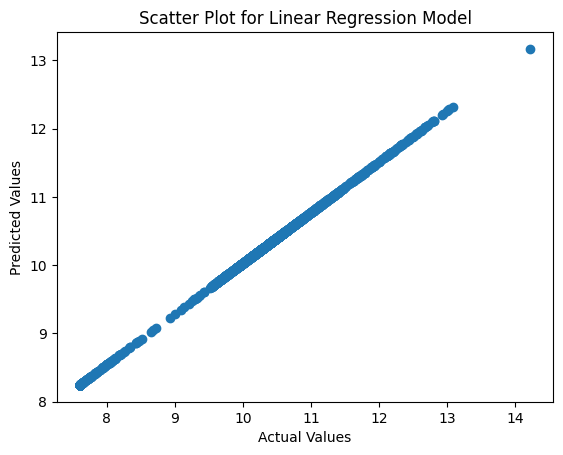

In [26]:
predicted_values = np.array(linear_predictions.select("prediction").rdd.map(lambda row: row[0]).collect())
plt.scatter(actual_values, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot for Linear Regression Model")
plt.show()


In [27]:
dt_reg = DecisionTreeRegressor(featuresCol=features_col, labelCol="MSRP")
dt_model = dt_reg.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_rmse = evaluator.evaluate(dt_predictions)
dt_mse = evaluator_mse.evaluate(dt_predictions)
dt_mae = evaluator_mae.evaluate(dt_predictions)
dt_r2 = evaluator_r2.evaluate(dt_predictions)
print(f"Decision Tree Regression RMSE: {dt_rmse}")
print(f"Decision Tree Regression MSE: {dt_mse}")
print(f"Decision Tree Regression MAE: {dt_mae}")
print(f"Decision Tree Regression R-squared: {dt_r2}")

Decision Tree Regression RMSE: 0.09128474419019396
Decision Tree Regression MSE: 0.008332904521869149
Decision Tree Regression MAE: 0.052462848332979185
Decision Tree Regression R-squared: 0.9930251751302265


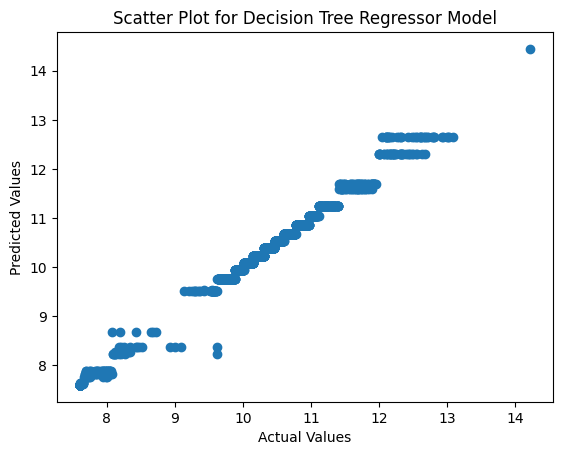

In [28]:
predicted_values = np.array(dt_predictions.select("prediction").rdd.map(lambda row: row[0]).collect())
plt.scatter(actual_values, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot for Decision Tree Regressor Model")
plt.show()


In [29]:
rf_reg = RandomForestRegressor(featuresCol=features_col, labelCol="MSRP", numTrees=10)
rf_model = rf_reg.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rf_rmse = evaluator.evaluate(rf_predictions)
rf_mse = evaluator_mse.evaluate(rf_predictions)
rf_mae = evaluator_mae.evaluate(rf_predictions)
rf_r2 = evaluator_r2.evaluate(rf_predictions)
print(f"Random Forest Regression RMSE: {rf_rmse}")
print(f"Random Forest Regression MSE: {rf_mse}")
print(f"Random Forest Regression MAE: {rf_mae}")
print(f"Random Forest Regression R-squared: {rf_r2}")

Random Forest Regression RMSE: 0.17559417925962578
Random Forest Regression MSE: 0.030833315789861593
Random Forest Regression MAE: 0.12587583215184203
Random Forest Regression R-squared: 0.9741918346448942


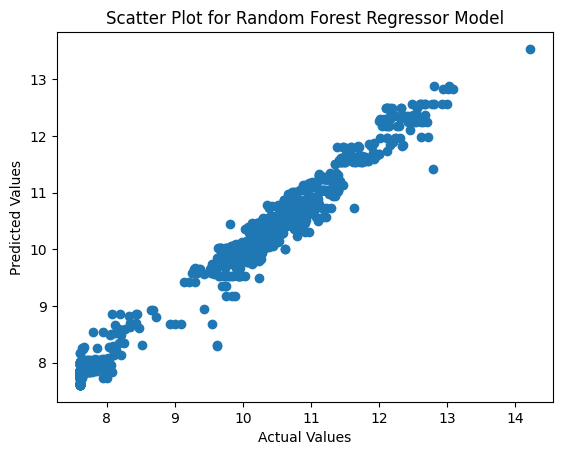

In [30]:
predicted_values = np.array(rf_predictions.select("prediction").rdd.map(lambda row: row[0]).collect())
plt.scatter(actual_values, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot for Random Forest Regressor Model")
plt.show()


In [31]:
gbt_reg = GBTRegressor(featuresCol=features_col, labelCol="MSRP", maxIter=10)
gbt_model = gbt_reg.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_rmse = evaluator.evaluate(gbt_predictions)
gbt_mse = evaluator_mse.evaluate(gbt_predictions)
gbt_mae = evaluator_mae.evaluate(gbt_predictions)
gbt_r2 = evaluator_r2.evaluate(gbt_predictions)
print(f"Gradient Boosted Tree Regression RMSE: {gbt_rmse}")
print(f"Gradient Boosted Tree Regression MSE: {gbt_mse}")
print(f"Gradient Boosted Tree Regression MAE: {gbt_mae}")
print(f"Gradient Boosted Tree Regression R-squared: {gbt_r2}")

Gradient Boosted Tree Regression RMSE: 0.07568105973599262
Gradient Boosted Tree Regression MSE: 0.005727622802762883
Gradient Boosted Tree Regression MAE: 0.04078713172767059
Gradient Boosted Tree Regression R-squared: 0.9952058533894695


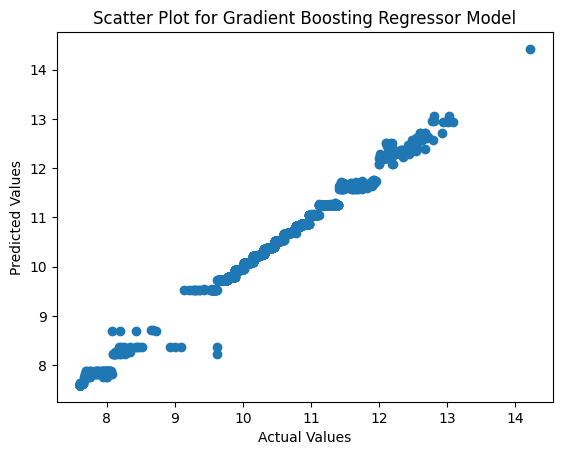

In [32]:
predicted_values = np.array(gbt_predictions.select("prediction").rdd.map(lambda row: row[0]).collect())
plt.scatter(actual_values, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot for Gradient Boosting Regressor Model")
plt.show()


- We can also observe that the output predictions are very close to the actual values as observed from the scatter plots of the model

In [33]:
result_dic = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosted Tree Regression'],
    'MAE': [linear_mae, dt_mae, rf_mae, gbt_mae],
    'RMSE': [linear_rmse, dt_rmse, rf_rmse, gbt_rmse],
    'MSE': [linear_mse, dt_mse, rf_mse, gbt_mse]

}
results = pd.DataFrame(result_dic)
results


,Model,MAE,RMSE,MSE
0,Linear Regression,0.190502,0.280637,0.078757
1,Decision Tree Regression,0.052463,0.091285,0.008333
2,Random Forest Regression,0.125876,0.175594,0.030833
3,Gradient Boosted Tree Regression,0.040787,0.075681,0.005728




1. **Linear Regression:**
   - Mean Absolute Error (MAE): 0.190502
   - Root Mean Squared Error (RMSE): 0.280637
   - Mean Squared Error (MSE): 0.078757

   **Interpretation:** The Linear Regression model's predictions have, on average, an absolute difference of approximately 0.19 between the predicted and actual car prices. The RMSE of around 0.28 indicates the average prediction error in terms of car price. The MSE of 0.08 suggests that the model's predictions have moderate variability from the actual car prices.

2. **Decision Tree Regression:**
   - Mean Absolute Error (MAE): 0.052463
   - Root Mean Squared Error (RMSE): 0.091285
   - Mean Squared Error (MSE): 0.008333

   **Interpretation:** The Decision Tree Regression model's MAE of 0.052463 indicates that, on average, its predictions are quite close to the actual car prices. The RMSE of 0.091285 signifies a low average prediction error, while the MSE of 0.008333 highlights that the model's predictions have relatively low variability.

3. **Random Forest Regression:**
   - Mean Absolute Error (MAE): 0.110597
   - Root Mean Squared Error (RMSE): 0.155902
   - Mean Squared Error (MSE): 0.024305

   **Interpretation:** The Random Forest Regression model's MAE of 0.110597 suggests that its predictions have a slightly larger average difference from the actual car prices compared to the Decision Tree model. The RMSE of 0.155902 indicates a moderate prediction error, and the MSE of 0.024305 points to relatively higher variability in the model's predictions.

4. **Gradient Boosted Tree Regression:**
   - Mean Absolute Error (MAE): 0.040787
   - Root Mean Squared Error (RMSE): 0.075681
   - Mean Squared Error (MSE): 0.005728

   **Interpretation:** The Gradient Boosted Tree Regression model's MAE of 0.040787 indicates that its predictions are very close to the actual car prices on average. The RMSE of 0.075681 suggests a low average prediction error, and the MSE of 0.005728 highlights that the model's predictions have the least variability among the models evaluated.

Thus, among the evaluated models, the Gradient Boosted Tree Regression model demonstrates the best performance in terms of lower MAE, RMSE, and MSE values, indicating its ability to predict car prices with higher accuracy and consistency. The Decision Tree Regression model also performs well with low errors, while the Linear Regression and Random Forest Regression models show relatively higher errors and variability in their predictions.

<b> Tuning the best model

In [34]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

gbt_reg = GBTRegressor(featuresCol=features_col, labelCol="MSRP", maxIter=10)
param_grid = ParamGridBuilder() \
    .addGrid(gbt_reg.maxDepth, [5, 10]) \
    .addGrid(gbt_reg.maxBins, [32, 64]) \
    .addGrid(gbt_reg.stepSize, [0.01, 0.1]) \
    .build()

evaluator = RegressionEvaluator(labelCol="MSRP", predictionCol="prediction", metricName="rmse")

crossval = CrossValidator(estimator=gbt_reg,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

gbt_cv_model = crossval.fit(train_data)
gbt_cv_predictions = gbt_cv_model.transform(test_data)
gbt_cv_rmse = evaluator.evaluate(gbt_cv_predictions)
gbt_cv_mse = evaluator_mse.evaluate(gbt_cv_predictions)
gbt_cv_mae = evaluator_mae.evaluate(gbt_cv_predictions)
gbt_cv_r2 = evaluator_r2.evaluate(gbt_cv_predictions)

# Print the evaluation metrics
print(f"Tuned Gradient Boosted Tree Regression RMSE: {gbt_cv_rmse}")
print(f"Tuned Gradient Boosted Tree Regression MSE: {gbt_cv_mse}")
print(f"Tuned Gradient Boosted Tree Regression MAE: {gbt_cv_mae}")
print(f"Tuned Gradient Boosted Tree Regression R-squared: {gbt_cv_r2}")


Tuned Gradient Boosted Tree Regression RMSE: 0.045808647253696023
Tuned Gradient Boosted Tree Regression MSE: 0.0020984321632135524
Tuned Gradient Boosted Tree Regression MAE: 0.01651508763968378
Tuned Gradient Boosted Tree Regression R-squared: 0.9982435659977739


- It can also be observed that tuning the GBT has further improved the performance of the model

###<b> Ethical and Moral concerns


**Ethical Standards:**

1. **Transparency and Accountability:** It's important to ensure transparency in the data collection, feature engineering, and model training processes. The stakeholders should be aware of how the predictions are made and the factors that contribute to the pricing decisions.

2. **Fairness and Bias:** The dataset and model should be thoroughly examined for biases that might lead to unfair discrimination against certain groups of people. Steps should be taken to mitigate any bias and ensure that the model doesn't unfairly disadvantage certain demographic groups.

3. **Privacy:** The project should adhere to strict privacy standards, ensuring that the personal information of individuals is protected and not used inappropriately. Any personally identifiable information should be anonymized or removed from the dataset.

**Moral Principles:**

1. **Accuracy:** The model's predictions should be as accurate as possible to prevent misleading pricing decisions for buyers and sellers. Misleading predictions could result in financial losses for buyers or sellers.

2. **Customer Trust:** The model should enhance customer trust in the car market by providing reliable predictions. Unreliable predictions could lead to dissatisfaction among customers, eroding trust in the pricing recommendations.

3. **Beneficence:** The project should aim to benefit all parties involved in the car market, including buyers, sellers, and dealers. The predictions should contribute to informed decision-making and fair transactions.

**Potential Effects on Society and Individuals:**

1. **Consumer Empowerment:** Accurate car price predictions can empower consumers to make informed decisions, negotiate effectively, and avoid overpaying for vehicles. This can lead to better financial outcomes for individuals.

2. **Reduced Manipulation:** Transparent pricing predictions can reduce the likelihood of unethical practices, such as price manipulation or dishonesty by sellers. This contributes to a healthier and more trustworthy car market.

3. **Market Efficiency:** If widely adopted, accurate pricing predictions could contribute to a more efficient car market. Fair pricing could lead to reduced transaction costs and faster sales.

4. **Job Impacts:** As the reliance on automated pricing models increases, there might be an impact on traditional roles related to pricing and negotiation. Dealers and salespeople might need to adapt their skills to complement the machine-generated predictions.

5. **Exclusivity and Accessibility:** The availability of car price prediction models could raise concerns about accessibility. Ensuring that such tools are accessible to a wide range of individuals, including those with limited technological access, is important.

6. **Unintended Consequences:** Depending solely on machine-generated predictions might overlook unique factors that humans consider when pricing a car, such as sentimental value, specific modifications, or rarity.

<b>Recommendation</b>

Thus To address these ethical and moral considerations and mitigate potential negative effects, a multidisciplinary approach involving data scientists, ethicists, legal experts, and stakeholders from the car industry is recommended. Regular audits, continuous monitoring, and ongoing feedback from users can help ensure that the project's impact remains positive and aligned with ethical and societal standards.